# Interactive gaussian anamorphosis modeling with hermite polynomials

Adrian Martinez Vargas
Adrian.Martinez@csaglobal.com
PhD in Geological Sciences. Senior Consultant.
CSA Global,
Toronto, Canada.


In [1]:
#general imports
import pygslib    
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

#make the plots inline
%matplotlib inline
#%matplotlib notebook

In [2]:
#get the data in gslib format into a pandas Dataframe
data= pd.DataFrame({'Z':[2.582,3.087,3.377,3.974,4.321,5.398,8.791,12.037,12.586,16.626]})
data['Declustering Weight'] = 1.0
data

,Z,Declustering Weight
0,2.582,1.0
1,3.087,1.0
2,3.377,1.0
3,3.974,1.0
4,4.321,1.0
5,5.398,1.0
6,8.791,1.0
7,12.037,1.0
8,12.586,1.0
9,16.626,1.0


## Interactive anamorphosis modeling

('Raw Variance', 21.852658090000006)
('Variance from PCI', 21.555664573944906)
('zamin', 3.5831255436568172)
('zamax', 17.62284064974921)
('yamin', -0.5284856971394278)
('yamax', 1.8407081416283257)
('zpmin', 2.582186575932491)
('zpmax', 17.626)
('ypmin', -1.644628925785157)
('ypmax', 2.9)


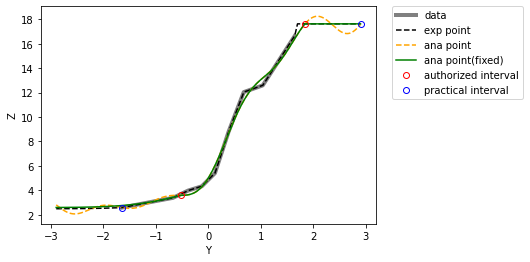

In [3]:
# Fit anamorphosis by changing, zmax, zmin, and extrapolation function
PCI, H, raw, zana, gauss, z, P, \
raw_var, PCI_var, fig1, \
zamin, zamax, yamin, yamax, \
zpmin, zpmax, ypmin, ypmax = pygslib.nonlinear.anamor(
                 z = data['Z'], 
                 w = data['Declustering Weight'], 
                 zmin = data['Z'].min()-0.1, 
                 zmax = data['Z'].max()+1,
                 zpmin = None,
                 zpmax = data['Z'].max()+1.5,
                 ymin=-2.9, ymax=2.9,
                 ndisc = 5000,
                 ltail=1, utail=4, ltpar=1, utpar=1.8, K=30)

In [4]:
PCI

array([ 7.27790000e+00, -4.28017669e+00,  1.23871656e+00,  8.36635528e-01,
       -6.68299991e-01, -2.67099171e-01,  3.81680849e-01,  1.21473386e-01,
       -2.34521491e-01, -9.19686922e-02,  1.63655484e-01,  9.40550953e-02,
       -1.34835534e-01, -9.94912223e-02,  1.27990204e-01,  9.92405431e-02,
       -1.31132432e-01, -9.16450599e-02,  1.37233489e-01,  7.78705229e-02,
       -1.42399754e-01, -5.99727890e-02,  1.44727712e-01,  4.00525389e-02,
       -1.43555404e-01, -1.99037236e-02,  1.38964127e-01,  8.96923975e-04,
       -1.31445919e-01,  1.60246501e-02,  1.21684077e-01])

## Block support transformation

('zamin blk', 2.588488060200776)
('zamax blk', 17.626)
('yamin blk', -2.8976795359071814)
('yamax blk', 2.8988397679535907)
('zpmin blk', 2.588441600077275)
('zpmax blk', 17.626)
('ypmin blk', -2.9)
('ypmax blk', 2.9)


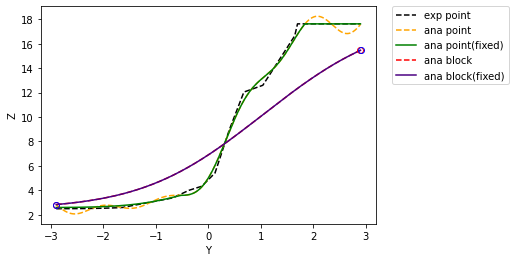

In [5]:
ZV, PV, fig2 = pygslib.nonlinear.anamor_blk( PCI, H, r = 0.6, gauss = gauss, Z = z,
                  ltail=1, utail=1, ltpar=1, utpar=1,
                  raw=raw, zana=zana)

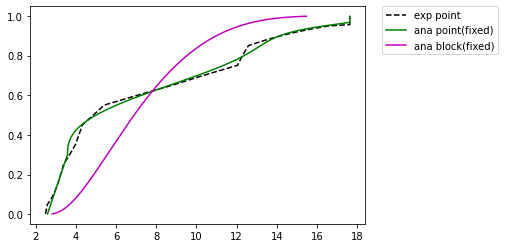

In [6]:
# the pair ZV, PV define the CDF in block support
# let's plot the CDFs
plt.plot (raw,P, '--k', label = 'exp point' ) 
plt.plot (z,P, '-g', label = 'ana point(fixed)' )  #point support (from gaussian anamorphosis)
plt.plot (ZV, PV, '-m',  label = 'ana block(fixed)')  #block support 
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

### Grade Tonnage curves

In [7]:
cutoff = np.arange(0,10, 0.1)
tt = []
gg = []
label = []

# calculate GTC from gaussian in block support 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=ZV, p=PV, varred = 1, ivtyp = 0, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('DGM\nblock support')

# calculate GTC using undirect lognormal 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 0.4, ivtyp = 2, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Indirect Lognormal\nblock support')

# calculate GTC using affine 
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 0.4, ivtyp = 1, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Affine\nblock support')

# calculate GTC in point support  
t,ga,gb = pygslib.nonlinear.gtcurve (cutoff = cutoff, z=z, p=P, varred = 1, ivtyp = 2, zmin = 0, zmax = None,
             ltail = 1, ltpar = 1, middle = 1, mpar = 1, utail = 1, utpar = 1,maxdis = 1000)
tt.append(t)
gg.append(ga)
label.append('Point (anamorphosis)\npoint support)')

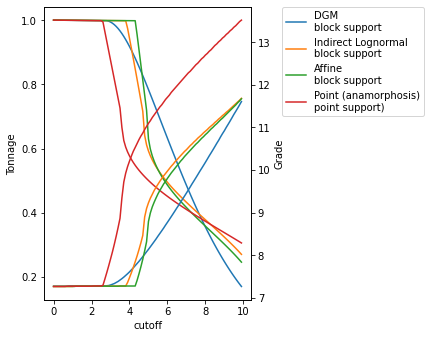

In [8]:
fig = pygslib.nonlinear.plotgt(cutoff = cutoff, t = tt, g = gg, label = label)

## Anamorphosis modeling from raw Z,Y pairs

('Raw Variance', 21.852658090000006)
('Variance from PCI', 17.711466254644904)


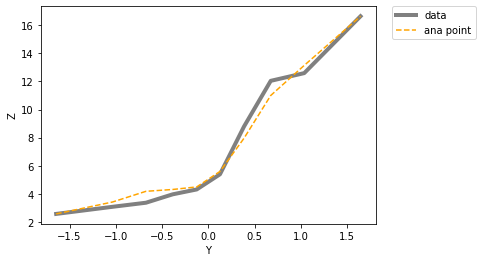

In [9]:
PCI, H, raw, zana, gauss, raw_var, PCI_var, ax2 = pygslib.nonlinear.anamor_raw(
                         z = data['Z'], 
                         w = data['Declustering Weight'], 
                         K=30)

In [10]:
PCI

array([ 7.27790000e+00, -3.82759336e+00,  1.24799451e+00,  6.92707152e-01,
       -6.28915708e-01, -2.09662489e-01,  3.54248744e-01,  9.63864927e-02,
       -2.37930194e-01, -7.09406273e-02,  1.98369413e-01,  6.10707998e-02,
       -1.93103671e-01, -4.65978068e-02,  1.99154287e-01,  2.41314403e-02,
       -2.04493057e-01,  4.12778575e-03,  2.03539527e-01, -3.45670477e-02,
       -1.94519949e-01,  6.37931546e-02,  1.77830408e-01, -8.92156210e-02,
       -1.54998367e-01,  1.09170439e-01,  1.28023728e-01, -1.22843431e-01,
       -9.89695792e-02,  1.30114975e-01,  6.97202334e-02])

In [11]:
print (zana)

[ 2.582       3.42678628  4.18832472  4.31839029  4.499497    5.60005213
  7.95648663 10.99765187 13.13519958 16.626     ]
